In [1]:
import cv2
import numpy as np

#Reference
#https://www.kaggle.com/code/bulentsiyah/deep-learning-based-semantic-segmentation-keras
#https://github.com/gabrielchao/terrainclassifier


In [2]:
ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1
ann_img[ 0 , 0 ] = 2 # this would set the label of pixel 0,0 as 2

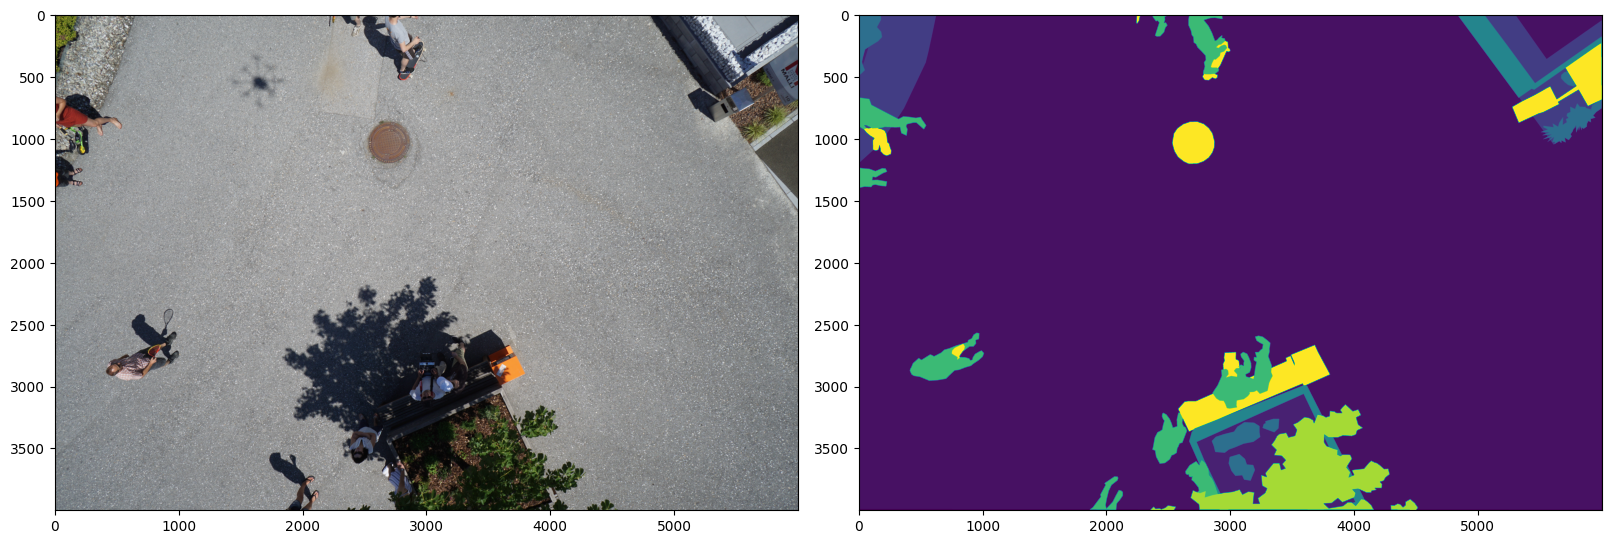

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "datasets\semantic_drone_dataset\original_images/000.jpg"
label_image_semantic = "datasets\semantic_drone_dataset\label_images_semantic/000.png"

fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)

In [4]:
kaggle_commit = True

epochs = 20
if kaggle_commit:
    epochs = 5

In [9]:
from keras_segmentation.models.unet import vgg_unet
from keras.utils import image_dataset_from_directory

n_classes = 23 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
model = vgg_unet(n_classes=n_classes ,  input_height=416, input_width=608  )

all_images = "datasets\semantic_drone_dataset\original_images"
all_labels = 'datasets\semantic_drone_dataset\label_images_semantic'

model.train( 
    train_images =  all_images,
    train_annotations = all_labels,
    checkpoints_path = "vgg_unet" , epochs=epochs
)

Verifying training dataset


100%|██████████| 400/400 [03:17<00:00,  2.02it/s]
C:\Users\riley\AppData\Roaming\Python\Python311\site-packages\keras_segmentation\train.py:156: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen, steps_per_epoch,


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 2015s 4s/step - loss: 3.5051 - accuracy: 0.1176
Epoch 2/5
512/512 [==============================] - 2018s 4s/step - loss: 3.1832 - accuracy: 0.2320
Epoch 3/5
512/512 [==============================] - 2006s 4s/step - loss: 2.9644 - accuracy: 0.3004
Epoch 4/5
512/512 [==============================] - 1936s 4s/step - loss: 2.7987 - accuracy: 0.3469
Epoch 5/5
512/512 [==============================] - 1931s 4s/step - loss: 2.6763 - accuracy: 0.3797


In [11]:
model.save_weights('kaggle_first_run.h5')

1/1 [==============================] - 0s 498ms/step


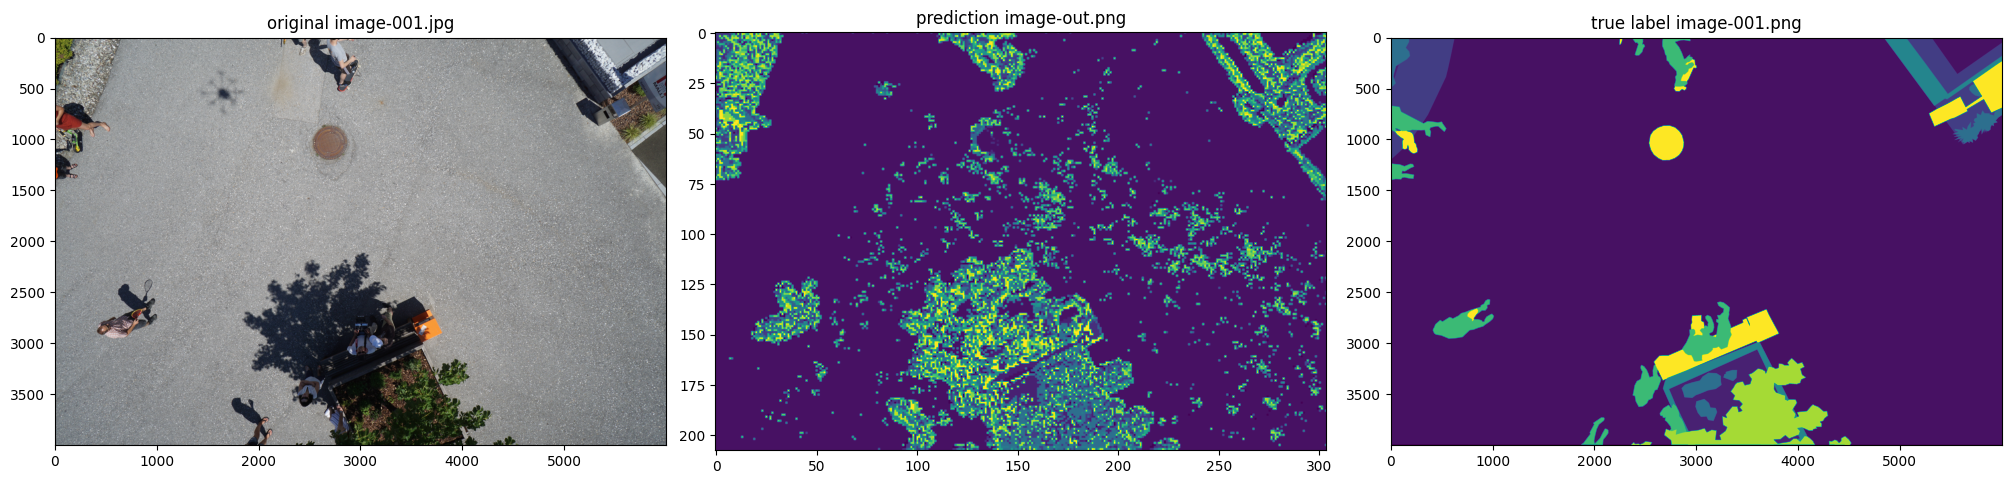

In [14]:
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = "datasets\semantic_drone_dataset\original_images/000.jpg"
out = model.predict_segmentation(
    inp=input_image,
    out_fname="out.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image-001.jpg')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "datasets\semantic_drone_dataset\label_images_semantic/000.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image-001.png')
axs[2].grid(False)

done = time.time()
elapsed = done - start